<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  üìå  Tr·ª±c Quan H√≥a D·ªØ Li·ªáu - 21_21 üìå
  
   Lab 1
</div>

# 3. EDA ( Ch√∫ √Ω khi s·ª≠ d·ª•ng 'df' ƒë·ªÉ tr√°nh thay ƒë·ªïi df g·ªëc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("data/US_Accidents_processed.csv")
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    # df[col]=pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')
    df[col]=pd.to_datetime(df[col], format='mixed')

## 3.1 Kh√°m ph√° m·ªói quan h·ªá gi·ªØa c√°c bi·∫øn

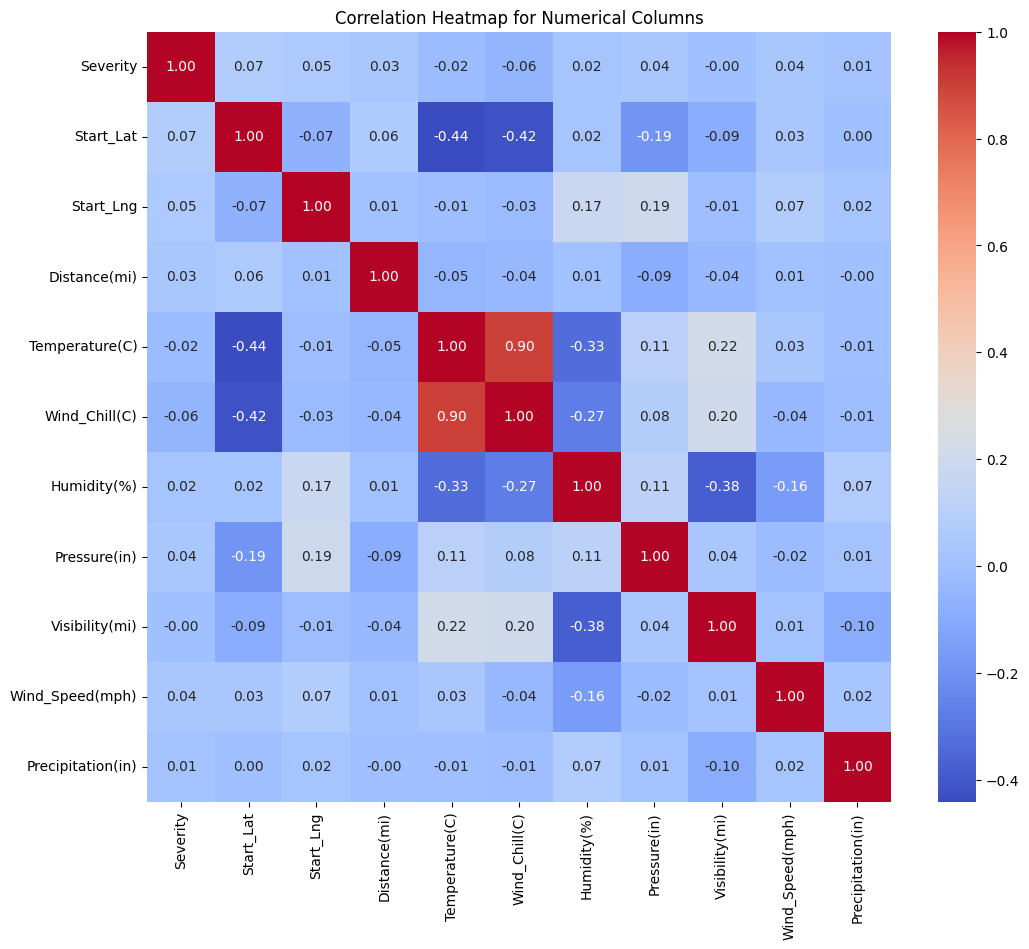

In [3]:
# variable_pairs = [(x, y) for i, x in enumerate(numerical_cols) for j, y in enumerate(numerical_cols) if i < j]

numerical_df = df.select_dtypes(include=[np.number])

# T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan
correlation_matrix = numerical_df.corr()

# V·∫Ω heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

**Comment**

Hexbin Plot th·ªÉ hi·ªán m·ªói quan h·ªá gi·ªØa **Nhi·ªát ƒë·ªô** v√† **ƒê·ªô ·∫©m** v·ªõi ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt l√† **Mostly Cloudy**

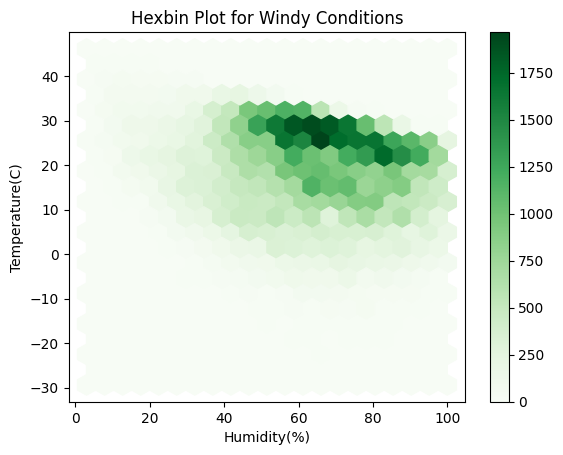

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫°o hexbin plot cho c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt ch·ª©a t·ª´ kh√≥a 'Windy'
windy_conditions = df[df['Weather_Condition'].str.contains('Mostly Cloudy', case=False)]
windy_conditions.shape
# V·∫Ω hexbin plot b·∫±ng Pandas

windy_conditions.plot.hexbin(x="Humidity(%)", y="Temperature(C)", gridsize=20, cmap='Greens')
plt.xlabel("Humidity(%)")
plt.ylabel("Temperature(C)")
plt.title("Hexbin Plot for Windy Conditions")
plt.show()

### Bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán chi·ªÅu d√†i trung b√¨nh ƒëo·∫°n ƒë∆∞·ªùng b·ªã ·∫£nh h∆∞·ªüng theo m·ª©c ƒë·ªô nghi√™m tr·ªçng c·ªßa v·ª• tai n·∫°n

- **L·ª£i √≠ch**: 
    - Gi√∫p ng∆∞·ªùi ƒë·ªçc h√¨nh dung ƒë∆∞·ª£c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa v·ª• tai n·∫°n theo m·ª©c ƒë·ªô nghi√™m tr·ªçng c·ªßa n√≥
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì**:
    - L·ª±a ch·ªçn bi·ªÉu ƒë·ªì c·ªôt ƒë·ªÉ d·ªÖ d√†ng so s√°nh ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa v·ª• tai n·∫°n gi·ªØa c√°c m·ª©c ƒë·ªô nghi√™m tr·ªçng t∆∞∆°ng ·ª©ng

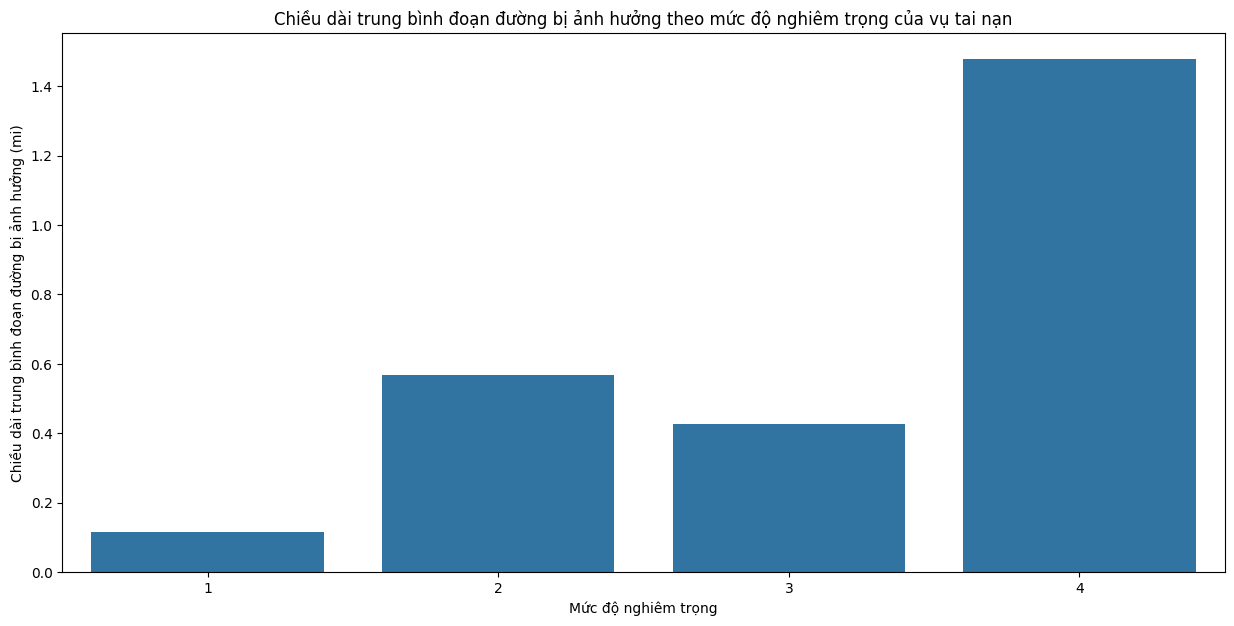

In [5]:

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize= (15, 7))
sns.barplot(x='Severity', y='Distance(mi)', data=df, errorbar=("ci", False))

plt.title('Chi·ªÅu d√†i trung b√¨nh ƒëo·∫°n ƒë∆∞·ªùng b·ªã ·∫£nh h∆∞·ªüng theo m·ª©c ƒë·ªô nghi√™m tr·ªçng c·ªßa v·ª• tai n·∫°n')
plt.xlabel('M·ª©c ƒë·ªô nghi√™m tr·ªçng')
plt.ylabel('Chi·ªÅu d√†i trung b√¨nh ƒëo·∫°n ƒë∆∞·ªùng b·ªã ·∫£nh h∆∞·ªüng (mi)')
plt.show()

**Nh·∫≠n x√©t**: 
- ƒê·ªô ·∫£nh h∆∞·ªüng tƒÉng v·ªçt t·ª´ m·ª©c ƒë·ªô 1 -> 2 v√† t·ª´ m·ª©c ƒë·ªô 3 -> 4. 
- C√≥ th·ªÉ cho r·∫±ng m·ª©c ƒë·ªô nghi√™m tr·ªçng c√†ng l·ªõn th√¨ ·∫£nh h∆∞·ªüng ƒë·∫øn giao th√¥ng c√†ng nhi·ªÅu.

### Bi·ªÉu ƒë·ªì Scatter bi·ªÉu di·ªÖn m·ªëi quan h·ªá gi·ªØa Nhi·ªát ƒë·ªô v√† ƒê·ªô gi√≥ l·∫°nh

- **L·ª£i √≠ch**:
    - Gi√∫p ng∆∞·ªùi ƒë·ªçc th·∫•y ƒë∆∞·ª£c m·ªëi t∆∞∆°ng quan gi·ªØa Nhi·ªát ƒë·ªô v√† ƒê·ªô gi√≥ l·∫°nh
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì**:
    - V√¨ ƒë·ªÉ th·ªÉ hi·ªán m·ªëi t∆∞∆°ng quan gi·ªØa 2 bi·∫øn li√™n t·ª•c n√™n s·∫Ω l·ª±a ch·ªçn bi·ªÉu ƒë·ªì scatter

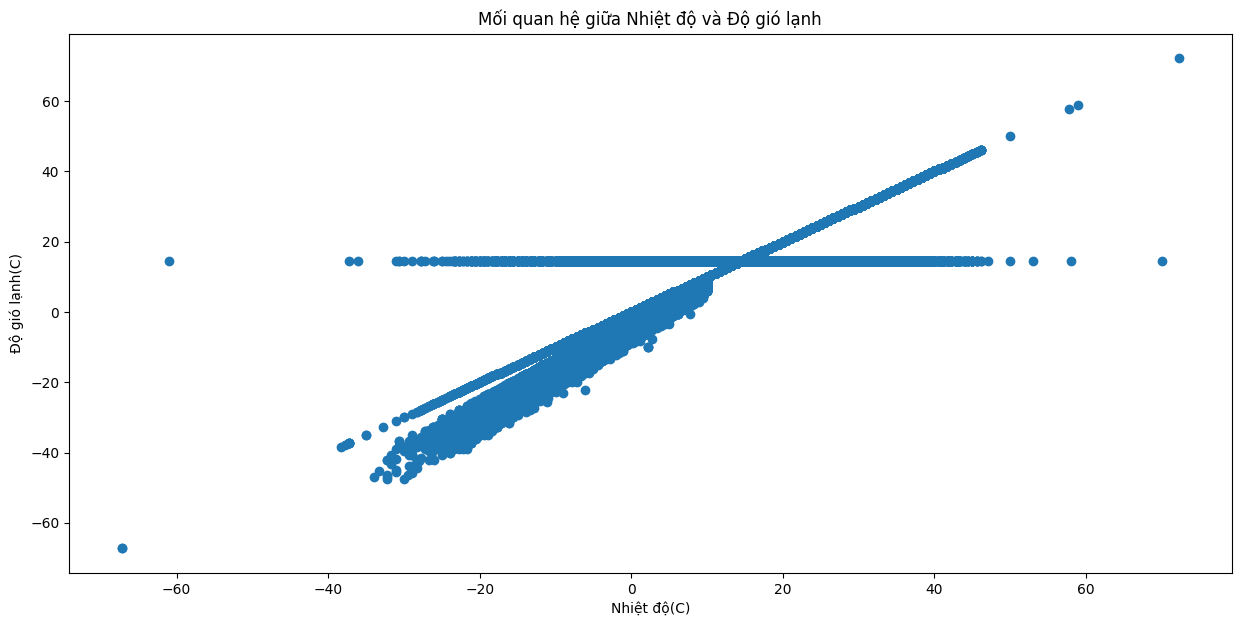

In [6]:

plt.figure(figsize = (15, 7))
plt.scatter(df["Temperature(C)"], df["Wind_Chill(C)"])
plt.title("M·ªëi quan h·ªá gi·ªØa Nhi·ªát ƒë·ªô v√† ƒê·ªô gi√≥ l·∫°nh")
plt.xlabel("Nhi·ªát ƒë·ªô(C)")
plt.ylabel("ƒê·ªô gi√≥ l·∫°nh(C)")
plt.show()

**Nh·∫≠n x√©t**:
- C√≥ th·ªÉ th·∫•y khi Nhi·ªát ƒë·ªô c√†ng tƒÉng th√¨ ƒê·ªô gi√≥ l·∫°nh c≈©ng c√≥ xu h∆∞·ªõng tƒÉng theo.
- T·ªìn t·∫°i m·ªôt ƒê·ªô gi√≥ l·∫°nh m√† ·ªü ƒë√≥ Nhi·ªát ƒë·ªô kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn n√≥.

## 3.2 C√°c c√¢u h·ªèi kh√°m ph√° d·ªØ li·ªáu

### T·ªïng quan t√¨nh h√¨nh tai n·∫°n qua c√°c nƒÉm
- **L·ª£i √≠ch:**
    - Gi√∫p ng∆∞·ªùi ƒë·ªçc c√≥ c√°i nh√¨n chung v·ªÅ t√¨nh h√¨nh tai n·∫°n giao th√¥ng qua c√°c nƒÉm
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì:**
    - Do m·ª•c ƒë√≠ch ch√≠nh c·ªßa ph·∫ßn n√†y l√† ƒë·ªÉ c√≥ c√°i nh√¨n chung v·ªÅ s·ªë ca tai n·∫°n theo t·ª´ng nƒÉm, n√™n ta c√≥ th·ªÉ s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì ƒë∆∞·ªùng ho·∫∑c bi·ªÉu ƒë·ªì mi·ªÅn. B√™n c·∫°nh ƒë√≥, do em mu·ªën nh√¨n th·∫•y s·ª± thay ƒë·ªïi c·ªßa c√°c ph√¢n lo·∫°i tai n·∫°n (theo m·ª©c ƒë·ªô nghi√™m tr·ªçng, theo th·ªùi gian,..) n√™n em s·∫Ω s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì mi·ªÅn

In [7]:
import plotly.express as px
import pandas as pd

# T·∫°o b·∫£n sao c·ªßa df
df_copy = df.copy()

# T·∫°o c·ªôt Year t·ª´ Start_Time
df_copy['Year'] = df_copy['Start_Time'].dt.year

# T√≠nh t·ªïng s·ªë v·ª• tai n·∫°n theo nƒÉm v√† m·ª©c ƒë·ªô nghi√™m tr·ªçng
df_grouped = df_copy.groupby(['Year', 'Severity']).size().reset_index(name='Count')

# V·∫Ω bi·ªÉu ƒë·ªì mi·ªÅn
fig = px.area(df_grouped, x="Year", y="Count", color="Severity",
              title='T·ªïng s·ªë v·ª• tai n·∫°n qua c√°c nƒÉm theo m·ª©c ƒë·ªô nghi√™m tr·ªçng',
              labels={'Count':'T·ªïng s·ªë v·ª• tai n·∫°n', 'Year':'NƒÉm', 'Severity':'M·ª©c ƒë·ªô nghi√™m tr·ªçng'})

fig.show()

In [8]:
# Group data by Year and Timezone
df_grouped_timezone = df_copy.groupby(['Year', 'Timezone']).size().reset_index(name='Count')

# Plot area chart for Timezone
fig_timezone = px.area(df_grouped_timezone, x="Year", y="Count", color="Timezone",
                       title='T·ªïng s·ªë v·ª• tai n·∫°n qua c√°c nƒÉm theo v·ªã tr√≠',
                       labels={'Count':'T·ªïng s·ªë v·ª• tai n·∫°n', 'Year':'NƒÉm', 'Timezone':'V·ªã tr√≠'})
fig_timezone.show()


In [9]:
# Group data by Year and Sunrise_Sunset
df_grouped_sunrise_sunset = df_copy.groupby(['Year', 'Sunrise_Sunset']).size().reset_index(name='Count')

# Plot area chart for Sunrise_Sunset
fig_sunrise_sunset = px.area(df_grouped_sunrise_sunset, x="Year", y="Count", color="Sunrise_Sunset",
                             title='T·ªïng s·ªë v·ª• tai n·∫°n qua c√°c nƒÉm theo bu·ªïi',
                             labels={'Count':'T·ªïng s·ªë v·ª• tai n·∫°n', 'Year':'NƒÉm', 'Sunrise_Sunset':'Bu·ªïi'})
fig_sunrise_sunset.show()


Nh·∫≠n x√©t:


### map (ƒëang ƒë·ªãnh b·ªè)

In [10]:
#   YOU CAN COMMENT THE CODE WHEN DOING YOUR TASK

# import folium
# from folium.plugins import MarkerCluster


# sample_df = df.sample(n=70000)  # Sample 70000 rows for demonstration

# # T·∫°o m·ªôt b·∫£n ƒë·ªì v·ªõi t·ªça ƒë·ªô trung b√¨nh c·ªßa d·ªØ li·ªáu
# map_center = list(sample_df[['Start_Lat','Start_Lng']].median())
# m = folium.Map(location=map_center, zoom_start=5)

# # Th√™m c√°c ƒë√°nh d·∫•u cho t·ª´ng ƒëi·ªÉm
# mc = MarkerCluster()
# for idx, row in sample_df.iterrows():
#     popup_text = f"Start_Lat: {row['Start_Lat']}, Start_Lng: {row['Start_Lng']}"
#     mc.add_child(folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=popup_text))

# m.add_child(mc)

# m

### 3.2.2 S·ªë v·ª• tai n·∫°n di·ªÖn ra trong c√°c ng√†y trong tu·∫ßn, c√°c th·ªùi ƒëi·ªÉm trong ng√†y ? 

- **L·ª£i √≠ch:** Gi√∫p cho ng∆∞·ªùi d√¢n bi·∫øt th·ªùi ƒëi·ªÉm n√†o hay x·∫£y ra tai n·∫°n ƒë·ªÉ h·∫°n ch·∫ø ra ƒë∆∞·ªùng, v√† c√°c c∆° quan c·∫£nh s√°t ƒë·ªãa ph∆∞∆°ng c√≥ th·ªÉ tƒÉng c∆∞·ªùng ƒëi tu·∫ßn tra v√†o th·ªùi ƒëi·ªÉm ƒë√≥ ƒë·ªÉ b·∫£o ƒë·∫£m tr·∫≠t t·ª± giao th√¥ng, h·∫°n ch·∫ø tai n·∫°n x·∫£y ra.
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì:** Bi·ªÉu ƒë·ªì `heatmap` s·∫Ω l√† ph√π h·ª£p nh·∫•t, v·ªõi c√°c c·ªôt l√† c√°c ng√†y trong tu·∫ßn, h√†ng l√† kho·∫£ng th·ªùi gian trong ng√†y (ƒë∆°n v·ªã 1 gi·ªù) .M√†u s·∫Øc trong m·ªôt √¥ s·∫Ω th·ªÉ hi·ªán s·ªë v·ª• tai n·∫°n trong th·ªùi ƒëi·ªÉm ƒë√≥.

In [11]:
# T·∫°o m·ªôt m·∫£ng 2D ch·ª©a s·ªë v·ª• tai n·∫°n giao th√¥ng cho m·ªói kho·∫£ng th·ªùi gian 2 ti·∫øng cho m·ªói ng√†y trong tu·∫ßn
accident_per_2hours_df = np.zeros((12, 7))

# Chuy·ªÉn ƒë·ªïi c·ªôt 'Start_Time' th√†nh ƒë·ªëi t∆∞·ª£ng datetime n·∫øu c·∫ßn
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# L·∫•y gi·ªù v√† ng√†y trong tu·∫ßn t·ª´ c·ªôt 'Start_Time'
hours = df['Start_Time'].dt.hour
days_of_week = df['Start_Time'].dt.dayofweek

# Chia gi·ªù th√†nh c√°c kho·∫£ng th·ªùi gian 2 ti·∫øng v√† t√≠nh to√°n s·ªë v·ª• tai n·∫°n 
# giao th√¥ng trong m·ªói kho·∫£ng th·ªùi gian
hour_bins = np.floor(hours / 2).astype(int)
accident_per_2hours_df = np.bincount(hour_bins * 7 + days_of_week, minlength=12*7).reshape(12, 7)



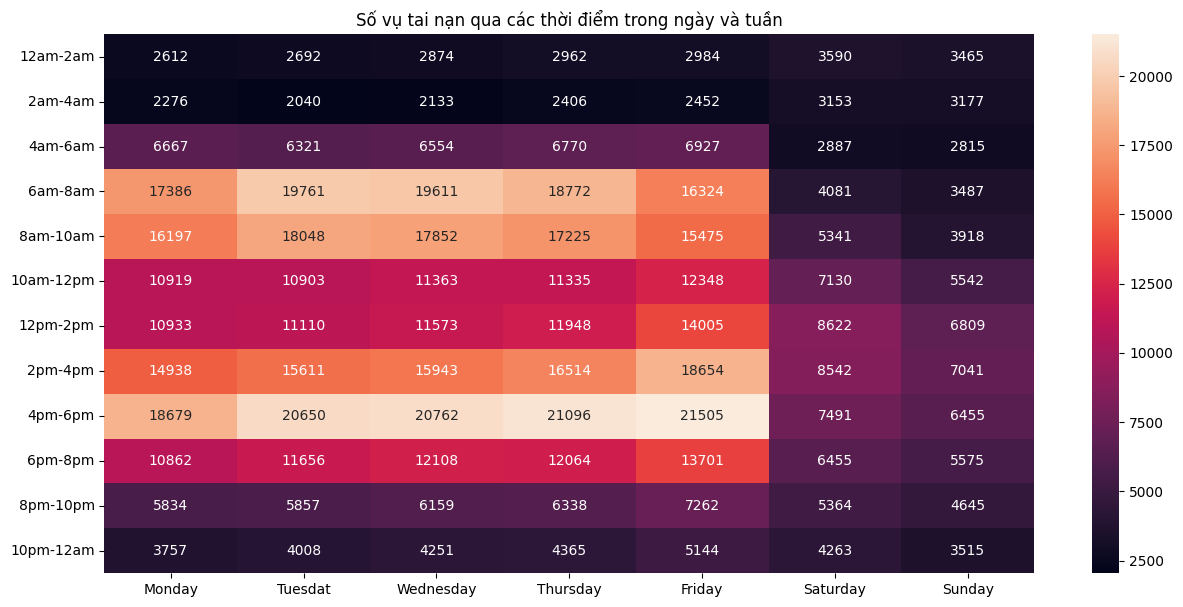

In [12]:
#G√°n nh√£n cho c·ªôt v√† h√†ng
y_label=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm",
         "12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"]

x_label=["Monday","Tuesdat","Wednesday","Thursday","Friday","Saturday","Sunday"]

accident_per_2hours_df=pd.DataFrame(accident_per_2hours_df,columns=x_label,index=y_label)
plt.figure(figsize=(15,7))
sns.heatmap(accident_per_2hours_df,annot=True,fmt='d')
plt.title('S·ªë v·ª• tai n·∫°n qua c√°c th·ªùi ƒëi·ªÉm trong ng√†y v√† tu·∫ßn')
plt.show()

- **K·∫øt lu·∫≠n r√∫t ra ƒë∆∞·ª£c:**
    - So v·ªõi c√°c ng√†y trong tu·∫ßn, th√¨ `Th·ª© 7` v√† `Ch·ªß nh·∫≠t` l√† c√°c ng√†y x·∫£y ra √≠t tai n·∫°n h∆°n so v·ªõi c√°c ng√†y c√≤n l·∫°i .C√≥ th·ªÉ v√¨ l√† ng√†y cu·ªëi tu·∫ßn ƒëa s·ªë ng∆∞·ªùi d√¢n s·∫Ω ·ªü nh√† ngh·ªâ ng∆°i, n√™n s·ªë ng∆∞·ªùi ra ƒë∆∞·ªùng √≠t h∆°n so v·ªõi c√°c ng√†y trong tu·∫ßn.
    - Th·ªùi ƒëi·ªÉm `6am-10am` v√† `4pm-6pm` l√† c√°c th·ªùi ƒëi·ªÉm x·∫£y ra nhi·ªÅu v·ª• tai n·∫°n nh·∫•t trong ng√†y, nh·∫•t l√† c√°c ng√†y trong tu·∫ßn. D·ªÖ hi·ªÉu v√¨ ƒë√¢y l√† c√°c gi·ªù cao ƒëi·ªÉm, l∆∞u l∆∞·ª£ng ph∆∞∆°ng ti·ªán l∆∞u th√¥ng tr√™n ƒë∆∞·ªùng ph·ªë r·∫•t cao, d·∫´n ƒë·∫øn c√°c v·ª• tai n·∫°n c√≥ th·ªÉ x·∫£y ra nhi·ªÅu h∆°n.

### 3.2.3 S·ªë v·ª• tai n·∫°n bi·∫øn ƒë·ªông qua c√°c nƒÉm nh∆∞ th·∫ø n√†o ?
- **L·ª£i √≠ch:**
    - Gi√∫p cho ng∆∞·ªùi d√¢n v√† c√°c c∆° quan ch√≠nh ph·ªß n·∫Øm b·∫Øt t√¨nh h√¨nh, th·ª±c tr·∫°ng tai n·∫°n ·ªü M·ªπ nh∆∞ th·∫ø n√†o th√¥ng qua c√°c bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ªë l∆∞·ª£ng v·ª• tai n·∫°n qua c√°c nƒÉm v√† s·ªë li·ªáu ƒë√≥ c√≥ t√≠nh chu k√¨ hay kh√¥ng .ƒêi·ªÅu n√†y gi√∫p cho c√°c c∆° quan c√≥ ph∆∞∆°ng √°n h·ª£p l√≠, k·ªãp th·ªùi ƒë·ªÉ x·ª≠ l√≠ c√°c v·∫•n ƒë·ªÅ tr√™n.
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì:**
    - Ta s·∫Ω th·ª±c hi·ªán decompose tr√™n d·ªØ li·ªáu s·ªë l∆∞·ª£ng v·ª• tai n·∫°n theo th·ªùi gian ƒë·ªÉ ph√¢n t√≠ch t√≠nh xu h∆∞·ªõng v√† chu k√¨, bi·ªÉu ƒë·ªì ph√π h·ª£p nh·∫•t s·∫Ω l√† bi·ªÉu ƒë·ªì ƒë∆∞·ªùng.

In [13]:
#Chu·∫©n b·ªã d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì
df_time=df['Start_Time'].dt.date
df_time=pd.DataFrame(df_time.value_counts().sort_index())
df_time.columns=['Number of accidents']

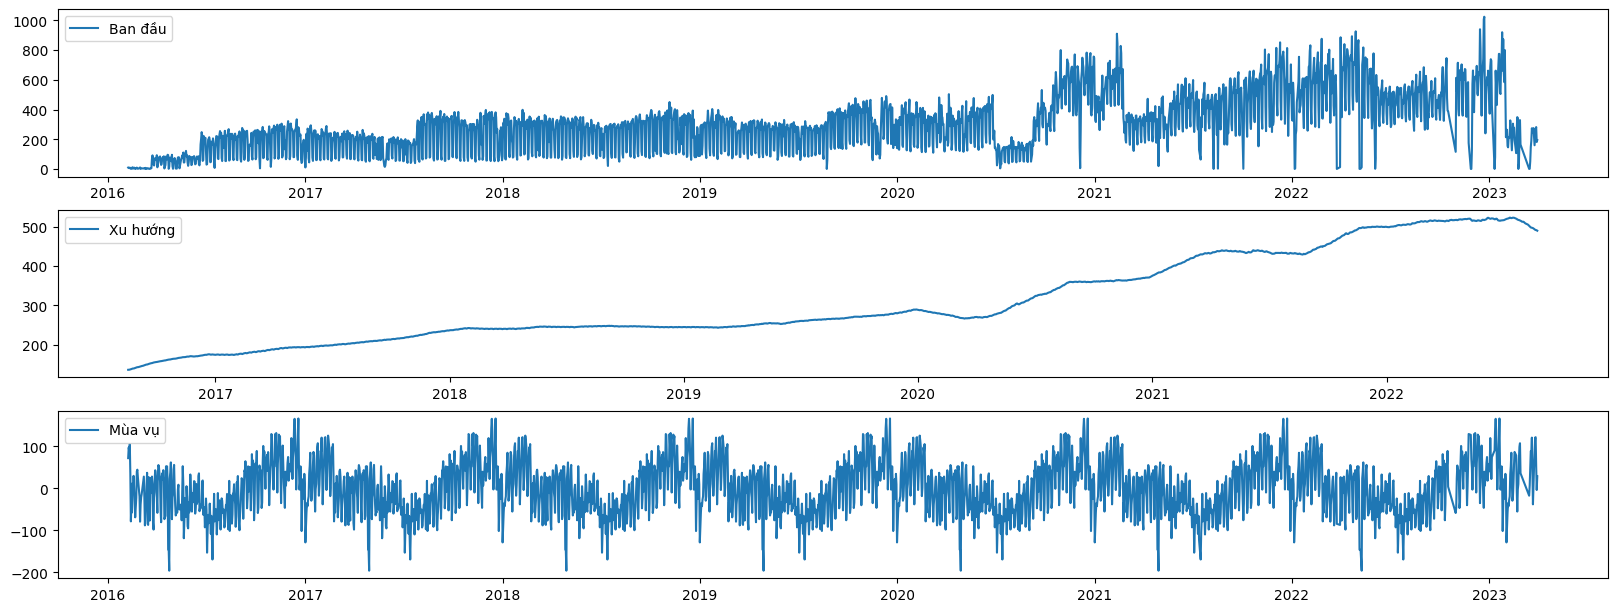

In [14]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Ph√¢n t√°ch th√†nh ph·∫ßn
result = seasonal_decompose(df_time['Number of accidents'], model='additive', period=365) # period: chu k·ª≥ theo nƒÉm

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(df_time.index, df_time['Number of accidents'], label='Ban ƒë·∫ßu')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Xu h∆∞·ªõng')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='M√πa v·ª•')
plt.legend()

plt.show()


- **K·∫øt lu·∫≠n r√∫t ra ƒë∆∞·ª£c:**
    - ƒê·ªëi v·ªõi bi·ªÉu ƒë·ªì xu h∆∞·ªõng, ta th·∫•y s·ªë l∆∞·ª£ng c√°c v·ª• tai n·∫°n ƒëang c√≥ xu h∆∞·ªõng tƒÉng theo th·ªùi gian, c√≥ th·ªÉ do c√†ng ng√†y d√¢n c∆∞ c√†ng ƒë√¥ng, t·ª∑ l·ªá s·ªü h·ªØu ph∆∞∆°ng ti·ªán c√° nh√¢n c√†ng nhi·ªÅu,.. d·∫´n ƒë·∫øn t·∫ßn su·∫•t c√°c ph∆∞∆°ng ti·ªán l∆∞u th√¥ng tr√™n ƒë∆∞·ªùng c√†ng cao, s·ªë v·ª• tai n·∫°n c√†ng tƒÉng.
    - ƒê√¥i v·ªõi bi·ªÉu ƒë·ªì th·ªÉ hi·ªán t√≠nh m√πa v·ª•, ta th·∫•y s·ªë l∆∞·ª£ng v·ª• tai n·∫°n c≈©ng c√≥ y·∫øu t·ªë m√πa v·ª• .S·ªë li·ªáu tƒÉng cao v√†o giai ƒëo·∫°n cu·ªëi nƒÉm, ƒë·∫ßu nƒÉm v√† gi·∫£m v√†o c√°c giai ƒëo·∫°n ·ªü gi·ªØa nƒÉm .ƒêi·ªÅu n√†y c√≥ th·ªÉ l√† do v√†o m√πa ƒë√¥ng (cu·ªëi nƒÉm, ƒë·∫ßu nƒÉm) th√¨ ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt kh√¥ng t·ªët ƒë·ªÉ l∆∞u th√¥ng tr√™n ƒë∆∞·ªùng nh∆∞:s∆∞∆°ng m√π, tuy·∫øt l√†m m·∫∑t ƒë∆∞·ªùng tr∆°n tr∆∞·ª£t,...

### 3.2.4 Di·ªÖn bi·∫øn m·ª©c ƒë·ªô tai n·∫°n ·ªü c√°c bang nh∆∞ th·∫ø n√†o ?
- **L·ª£i √≠ch:**
    - Gi√∫p cho ng∆∞·ªùi d√¢n n∆∞·ªõc M·ªπ v√† c√°c c∆° quan ch√≠nh ph·ªß n·∫Øm b·∫Øt t√¨nh h√¨nh, th·ª±c tr·∫°ng tai n·∫°n ·ªü M·ªπ nh∆∞ th·∫ø n√†o qua c√°c bang, c·∫•p ƒë·ªô ƒë·ªÉ nh·ªØng c∆° quan c·ªßa t·ª´ng bang c√≥ nh·ªØng quy ƒë·ªãnh, lu·∫≠t ri√™ng ph√π h·ª£p.
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì:**
    - C√≥ th·ªÉ th·ªÉ hi·ªán ƒëi·ªÅu n√†y b·∫±ng bi·ªÅu ƒë·ªì c·ªôt ch·ªìng, nh∆∞ng ƒë·ªÉ th·ªÉ hi·ªán t·ªët h∆°n y·∫øu t·ªë ƒë·ªãa l√Ω th√¨ bi·ªÉu ƒë·ªì choropleth s·∫Ω ph√π h·ª£p v√† th·ªÉ hi·ªán t·ªët h∆°n.

In [15]:
#Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt 
import folium 
from selenium import webdriver
import os   
import time

In [16]:
#Chu·∫©n b·ªã data cho bi·ªÉu ƒë·ªì 

#D√πng value_counts() ƒë·ªÉ t√≠nh s·ªë v·ª• tai n·∫°n theo bang (state) v√† m·ª©c ƒë·ªô  (severity)
state_num_acc_df=df[['Severity','State']].value_counts().to_frame().reset_index()
state_num_acc_df=state_num_acc_df.rename(columns={0:"Num"})
state_num_acc_df.head()

Severity State   count
0         2    CA  143801
1         2    FL   75014
2         2    TX   45008
3         2    SC   33441
4         2    NC   29573

In [17]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Timezone',
       'Weather_Timestamp', 'Temperature(C)', 'Wind_Chill(C)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [18]:
#H√†m t√≠nh c√°c gi√° tr·ªã lat,lon trung t√¢m c·ªßa m·ªói state
def Create_Center_LatLong_State():
    state_df=df[['State','Start_Lat','Start_Lng']]
    state_df=state_df.groupby('State').mean()
    return state_df
def Create_Map_Followed_By_Severity(severity,html_name):
    """T·∫°o map hi·ªÉn th·ªã s·ªë v·ª• tai n·∫°n theo bang, theo m·ª©c ƒë·ªô nghi√™m tr·ªçng.
    Returns:
        file html:
    """
    #G·ªçi ƒë·ªÉ l·∫•y d·ªØ li·ªáu v·ªã tr√≠ khu v·ª±c B·∫Øc M·ªπ 
    southcentral_geo = 'https://raw.githubusercontent.com/samwilliamsprojects/southCentralRegion/main/southcentraljson.geojson' 

    # T√≠nh to√°n trung t√¢m c·ªßa n∆∞·ªõc M·ªπ (latitude, longitude), ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ban ƒë·∫ßu
    us_center_latitude = (49.384358 + 24.396308) / 2
    us_center_longitude = (-66.93457 + -125.00165) / 2
    
    #T·∫°o map v·ªõi center map ban ƒë·∫ßu ƒë∆∞·ª£c g√°n ·ªü bi·∫øn location, ƒë·ªô ph√≥ng to ban ƒë·∫ßu (zoom_start)
    _map = folium.Map(location=[us_center_latitude, us_center_longitude], zoom_start=4.2)
    
    
    #Ch·ªçn m·ª©c ƒë·ªô ƒë·ªÉ hi·ªán th·ªã 
    state_num_acc_df_plot=state_num_acc_df[state_num_acc_df['Severity']==severity]
    
    
    folium.Choropleth(
        geo_data=southcentral_geo,  # new geojson data
        name="choropleth",         #t√™n l·ªõp bi·ªÉu ƒë·ªì 
        data=state_num_acc_df_plot,  #data d√πng ƒë·ªÉ v·∫Ω 
        columns=["State", "Num"],     #c√°c c·ªôt d√πng ƒë·ªÉ √°nh x·∫° v·ªõi thu·ªôc t√≠nh state b·∫£n ƒë·ªì 
        key_on="feature.properties.id",  #thu·ªôc t√≠nh trong d·ªØ li·ªáu ƒë·ªãa l√Ω (geojson) ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ k·∫øt n·ªëi v·ªõi data
        fill_color="YlGn",      #m√†u s·∫Øc ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√¥ m√†u c√°c khu v·ª±c tr√™n bi·ªÉu ƒë·ªì choropleth
        fill_opacity=0.7,        #ƒë·ªô trong su·ªët c·ªßa m√†u s·∫Øc ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√¥ m√†u c√°c khu v·ª±c
        line_opacity=0.1,       #ƒë·ªô trong su·ªët c·ªßa c√°c ƒë∆∞·ªùng bi√™n gi·ªõi gi·ªØa c√°c khu v·ª±c 
        legend_name="No.Accident ",  # T√™n c·ªßa ch√∫ gi·∫£i tr√™n bi·ªÉu ƒë·ªì choropleth
    ).add_to(_map)
     
    
    #G·ªçi l·∫°i ƒë·ªÉ l·∫•y d·ªØ li·ªáu latlong trung t√¢m c·ªßa m·ªói state
    state_df=Create_Center_LatLong_State()

    # Th√™m t√™n c·ªßa c√°c bang v√†o b·∫£n ƒë·ªì
    for state in list(state_df.index):
         folium.Marker(state_df.loc[state,:], icon=folium.DivIcon
                       (html=f'<div style="font-family: Arial; font-size: 12pt;">{state}</div>')).add_to(_map)
         
    #L∆∞u l·∫°i b·∫£n ƒë·ªì d∆∞·ªõi d·∫°ng file html 
    _map.save(html_name)  
   
def Cap_Picture(image_path,html_name):
    #L·∫•y ƒë∆∞·ªùng d·∫´n hi·ªán t·∫°i 
    driver_path=os.getcwd()
    
    #T·∫°o m·ªôt web ƒëriver 
    driver = webdriver.Chrome()
    
    #T·∫°o ƒë∆∞·ªùng d·∫´n ƒë·ªÉ ti·∫øn h√†nh m·ªü render file html l√™n
    html_file_path = "file://"+driver_path+"/"+html_name
    
    
    # Render file b·∫£n ƒë·ªì (html)
    driver.get(html_file_path)

    #Ch·ªù 2s ƒë·ªÉ render xong m·ªõi cap m√†n h√¨nh 
    time.sleep(2)
    
    # Cap m√†n h√¨nh l·∫°i v√† l∆∞u file 
    driver.save_screenshot(image_path)

    # ƒê√≥ng wedriver
    driver.quit()

In [19]:
#Danh s√°ch c√°c severity trong b·ªô d·ªØ li·ªáu 
severities=[1,2,3,4]

#T√™n file html d√πng chung cho t·∫•t c·∫£ severity
default_html_name="accidents_map.html"

#L·∫•y ƒë∆∞·ªùng d·∫´n hi·ªán t·∫°i 
driver_path=os.getcwd()

#Ch∆∞a c√≥ folder Image ƒë·ªÉ l∆∞u c√°c h√¨nh ·∫£nh th√¨ t·∫°o 
if not os.path.exists(driver_path+"/Image"):
    os.mkdir(driver_path+"/Image")
    
#Duy·ªát qua c√°c severity ƒë·ªÉ t·∫°o b·∫£n ƒë·ªì,recap b·∫£n ƒë·ªì b·∫±ng selenum,l∆∞u l·∫°i file ·∫£nh 
for severity in severities:
    
    #T·∫°o map v√† l∆∞u l·∫°i v√†o file html d√πng chung
    Create_Map_Followed_By_Severity(severity,default_html_name)

    #T·∫°o t√™n/ƒë∆∞·ªùng d·∫´n h√¨nh ·∫£nh 
    image_path=driver_path+"/Image/State_With_Severity_{}.png".format(severity)
    
    #N·∫øu ƒë√£ c√≥ phi√™n b·∫£n tr∆∞·ªõc ƒë√≥, xo√° v√† c·∫≠p nh·∫≠t
    if os.path.exists(image_path):
        os.remove(image_path)
    
    #Recap m√†n h√¨nh v√† l∆∞u file l·∫°i 
    Cap_Picture(image_path,default_html_name)


KeyError: 'Num'

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=2)
for id,severity in enumerate(severities): 
    image_path=driver_path+"/Image/State_With_Severity_{}.png".format(severity)
    # ƒê·ªçc c√°c h√¨nh ·∫£nh .png t·ª´ ƒë∆∞·ªùng d·∫´n v√† hi·ªÉn th·ªã ch√∫ng tr√™n t·ª´ng subplot
    image1 = plt.imread(image_path)
    
    ax[id//2][id%2].imshow(image1)
    ax[id//2][id%2].axis('off')
    ax[id//2][id%2].set_title("Ph√¢n b·ªë s·ªë c√°c v·ª• tai n·∫°n m·ª©c ƒë·ªô {}".format(severity))

- K·∫øt lu·∫≠n r√∫t ra:
    - H·∫ßu h·∫øt c√°c bang c√≥ s·ª± ph√¢n b·ªë s·ªë v·ª• tai n·∫°n kh√¥ng ƒë·ªìng ƒë·ªÅu ·ªü c√°c bang, c√°c c·∫•p ƒë·ªô.
    - Bang `California` l√† bang c√≥ s·ªë v·ª• tai n·∫°n ·ªü t·∫•t c·∫£ c√°c m·ª©c ƒë·ªô l√† nhi·ªÅu nh·∫•t .ƒêi·ªÅu n√†y c√≥ th·ªÉ do bang n√†y l√† bang ƒë√¥ng d√¢n nh·∫•t n∆∞·ªõc M·ªπ v√† l√† n∆°i trung t√¢m v·∫≠n t·∫£i quan tr·ªçng c·ªßa qu·ªëc gia n√†y, n√™n t·ª∑ l·ªá x·∫£y ra c√°c v·ª• n·∫°n c√≥ l·∫Ω s·∫Ω cao h∆°n so v·ªõi c√°c bang kh√°c.

### 3.2.5 C√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt ·ªü ban ng√†y v√† ban ƒë√™m khi x·∫£y ra tai n·∫°n?
- **L·ª£i √≠ch:**
    - Gi√∫p m·ªçi ng∆∞·ªùi tham gia giao th√¥ng ·ªü nh·ªØng ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt x·∫•u c√≥ s·ª± c·∫£nh gi√°c.
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì**
    - Bi·ªÉu ƒë·ªì c√°nh b∆∞·ªõm, gi√∫p th·ªÉ hi·ªán s·ª± t∆∞∆°ng quan gi·ªØa ban ng√†y v√† ban ƒë√™m ·ªü t·ª´ng ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt.

In [ ]:
def butterfly_chart(data: pd.DataFrame, title: str = None, middle_label_offset=0.01, figsize=(5, 2), wspace=0.6):
    """ """
    plt.rcParams.update({
        'figure.facecolor': 'w',
        'font.size': 12,
        'axes.titlesize': 16,
        'xtick.labelsize': 10,
        'patch.force_edgecolor': True,
        'patch.facecolor': 'black',
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'xtick.bottom': False,
        'xtick.top': False,
        'axes.titlepad': 10,
        'axes.grid': True,
        'grid.color': 'k',
        'grid.linestyle': ':',
        'grid.linewidth': 0.5,
        'lines.dotted_pattern': [1, 3],
        'lines.scale_dashes': False
    })

    fig, (ax1, ax2) = plt.subplots(
        figsize=figsize,
        dpi=100,
        nrows=1,
        ncols=2,
        subplot_kw={'yticks': []},
        gridspec_kw={'wspace': wspace},
    )
    
    # Ph√¢n lo·∫°i d·ªØ li·ªáu theo ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt v√† th·ªùi gian (Ng√†y v√† ƒê√™m)
    day_weather_counts = data[data["Sunrise_Sunset"] == "Day"]["Weather_Condition"].value_counts().head(10)
    night_weather_counts = data[data["Sunrise_Sunset"] == "Night"]["Weather_Condition"].value_counts().head(10)

    # L·∫•y danh s√°ch 10 ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt nhi·ªÅu nh·∫•t
    all_conditions = list(set(day_weather_counts.index) | set(night_weather_counts.index))

    # ƒê·∫£m b·∫£o r·∫±ng t·∫•t c·∫£ c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt c√≥ s·∫µn trong c·∫£ ng√†y v√† ƒë√™m
    day_weather_counts = day_weather_counts.reindex(all_conditions, fill_value=0)
    night_weather_counts = night_weather_counts.reindex(all_conditions, fill_value=0)

    # plot the data
    y = range(len(all_conditions))

    ax1.barh(y=y, width=day_weather_counts, color='tab:blue', zorder=3)
    ax1.invert_xaxis()
    ax1.set_title('Ng√†y')

    ax2.barh(y=y, width=night_weather_counts, color='tab:orange', zorder=3)
    ax2.set_title('ƒê√™m')
    
    # forced shared xlim
    x_max = max(ax1.get_xlim()[0], ax2.get_xlim()[0])
    ax1.set_xlim((x_max, 0))
    ax2.set_xlim((0, x_max))
    

    # turn on axes spines on the inside y-axis
    ax1.spines['right'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    

    # place center labels
    transform = transforms.blended_transform_factory(fig.transFigure, ax1.transData)
    for i, label in enumerate(all_conditions):
        ax1.text(0.5+middle_label_offset, i, label, ha='center', va='center', transform=transform)

    plt.suptitle(title, y=1.05, fontsize='x-large')

# S·ª≠ d·ª•ng h√†m butterfly_chart v·ªõi d·ªØ li·ªáu c·ªßa b·∫°n
# data l√† DataFrame ch·ª©a c·ªôt "Weather_Condition" v√† "Sunrise_Sunset"
butterfly_chart(
    df,
    figsize=(16, 5),
    wspace=0.35,
    middle_label_offset=0.015,
    title='Top 10 ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt khi x·∫£y ra tai n·∫°n'
)
plt.show()

- **Nh·∫≠n x√©t**
    - Ta c√≥ th·ªÉ th·∫•y h·∫ßu h·∫øt c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt ƒë·ªÅu xu·∫•t hi·ªán ·ªü hai ph√≠a, s·ªë v·ª• tai n·∫°n ·ªü ban ng√†y nhi·ªÅu h∆°n ban ƒë√™m, c√≥ th·ªÉ do ·ªü ban ng√†y l∆∞u l∆∞·ª£ng giao th√¥ng nhi·ªÅu h∆°n. 
    - Haze v√† Fog l√† hai hi·ªán t∆∞·ª£ng S∆∞∆°ng M√π ·ªü ri√™ng bi·ªát ·ªü ban ng√†y v√† ban ƒë√™m, n√™n s·ª± xu·∫•t hi·ªán ·ªü tr√™n bi·ªÉu ƒë·ªì l√† h·ª£p l√≠.

### 3.2.6 ·∫¢nh h∆∞·ªüng c·ªßa t·ªëc ƒë·ªô gi√≥ v√† t·∫ßm nh√¨n ƒë·∫øn tai n·∫°n?
- **L·ª£i √≠ch:**
    - Hi·ªÉu r√µ h∆°n v·ªÅ m·ªëi quan h·ªá gi·ªØa t·ªëc ƒë·ªô gi√≥ v√† t·∫ßm nh√¨n v·ªõi t√¨nh tr·∫°ng tai n·∫°n giao th√¥ng, t·ª´ ƒë√≥ c√≥ nh·ªØng bi·ªán ph√°p an to√†n.
- **L·ª±a ch·ªçn bi·ªÉu ƒë·ªì**
    - Scatter plot ƒë·ªÉ x√°c ƒë·ªãnh t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn li√™n t·ª•c, ·ªü ƒë√¢y l√† t·ªëc ƒë·ªô gi√≥ / t·∫ßm nh√¨n v·ªõi s·ªë l∆∞·ª£ng tai n·∫°n.

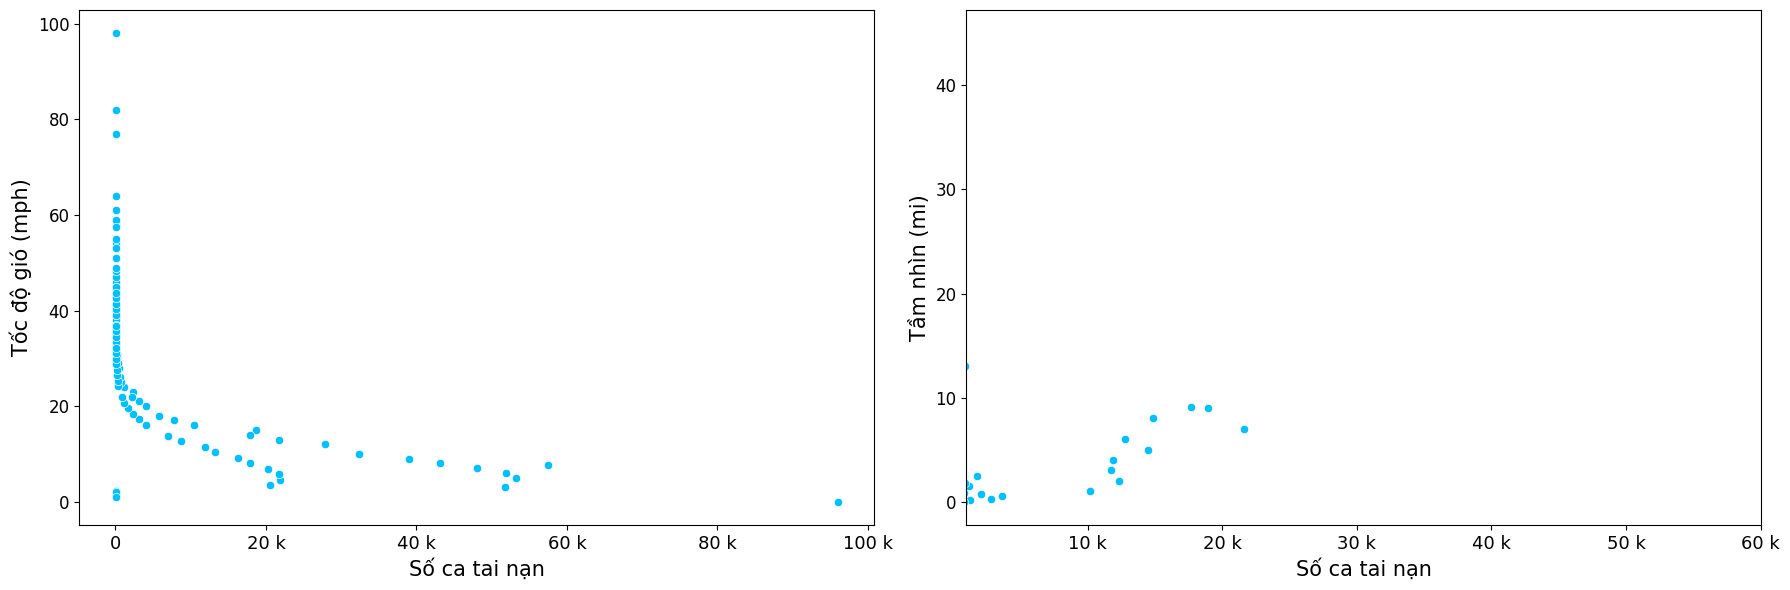

In [ ]:
# T·∫°o DataFrame cho d·ªØ li·ªáu v·ªÅ t·ªëc ƒë·ªô gi√≥
wind = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index()
wind.columns = ["Wind_Speed", "Cases"]

# T·∫°o DataFrame cho d·ªØ li·ªáu v·ªÅ t·∫ßm nh√¨n
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index()
visibility.columns = ["Visibility", "Cases"]

# T·∫°o subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# V·∫Ω bi·ªÉu ƒë·ªì cho d·ªØ li·ªáu v·ªÅ t·ªëc ƒë·ªô gi√≥
sns.scatterplot(x=wind.Cases, y=wind.Wind_Speed[wind.Wind_Speed < 100], ax=axs[0], color='deepskyblue')
axs[0].set_ylabel('T·ªëc ƒë·ªô gi√≥ (mph)', fontsize=15)
axs[0].set_xlabel('S·ªë ca tai n·∫°n', fontsize=15)
axs[0].tick_params(axis='x', labelsize=13)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].xaxis.set_major_formatter(ticker.EngFormatter())

# V·∫Ω bi·ªÉu ƒë·ªì cho d·ªØ li·ªáu v·ªÅ t·∫ßm nh√¨n
sns.scatterplot(x=visibility.Cases, y=visibility.Visibility[visibility.Visibility < 50], ax=axs[1], color='deepskyblue')
axs[1].set_ylabel('T·∫ßm nh√¨n (mi)', fontsize=15)
axs[1].set_xlabel('S·ªë ca tai n·∫°n', fontsize=15)
axs[1].tick_params(axis='x', labelsize=13)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xlim(1000, 60000)
axs[1].xaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()

plt.show()


- **Nh·∫≠n x√©t**
    - Trong ƒëa s·ªë c√°c ca tai n·∫°n x·∫£y ra, t·ªëc ƒë·ªô gi√≥ n·∫±m trong kho·∫£ng 5 - 10 (mph), kh√¥ng ph·∫£i l√† t·ªëc ƒë·ªô ƒë√°ng k·ªÉ (l·ªõn).
    
    - T∆∞∆°ng t·ª±, trong ƒëa s·ªë c√°c ca tai n·∫°n x·∫£y ra, ph·∫°m vi t·∫ßm nh√¨n n·∫±m trong kho·∫£ng t·ª´ 5 - 10 (mi), l√† m·ªôt kho·∫£ng an to√†n.
    
    => Do ƒë√≥, t·ªëc ƒë·ªô gi√≥ v√† t·∫ßm nh√¨n kh√¥ng ph·∫£i l√† nh·ªØng nguy√™n nh√¢n ch√≠nh g√¢y ra tai n·∫°n.